# 4. Merging species counts tables into one counts table for all species

In [52]:
import os
import pandas as pd
import numpy as np
# requires dammit env
# source activate dammit
#from dammit.fileio.gff3 import GFF3Parser
%matplotlib inline
import pylab as plt
from matplotlib_venn import venn2

In [58]:
counts_dir = "/Users/johnsolk/Documents/UCDavis/Whitehead/kfish_expression_July2019/tximport_counts_ensembl/"
counts_matrices = os.listdir(counts_dir)
print(counts_matrices)

['F_sciadicus_counts_ensembl.csv', 'F_rathbuni_counts_ensembl.csv', 'F_zebrinus_counts_ensembl.csv', 'F_grandis_counts_ensembl.csv', 'F_notatus_counts_ensembl.csv', '.DS_Store', 'F_parvapinis_counts_ensembl.csv', 'L_goodei_counts_ensembl.csv', 'F_olivaceous_counts_ensembl.csv', 'L_parva_counts_ensembl.csv', 'F_heteroclitusMDPP_counts_ensembl.csv', 'F_similis_counts_ensembl.csv', 'F_diaphanus_counts_ensembl.csv', 'F_chrysotus_counts_ensembl.csv', 'F_nottii_counts_ensembl.csv', 'A_xenica_counts_ensembl.csv', 'F_catanatus_counts_ensembl.csv', 'F_heteroclitusMDPL_counts_ensembl.csv']


In [54]:
test = pd.read_csv(counts_dir + 'F_nottii_counts_ensembl.csv',sep="\t")
test = test.rename(columns={'Unnamed: 0': 'Ensembl'})

In [55]:
test.head()

,Ensembl,F_nottii_FW_1.quant,F_nottii_FW_2.quant
0,ENSFHEP00000000003,15121.212,13438.264
1,ENSFHEP00000000004,87479.178,77527.286
2,ENSFHEP00000000005,95.001,153.000
3,ENSFHEP00000000006,2.000,5.000
4,ENSFHEP00000000007,11.000,28.000


19881


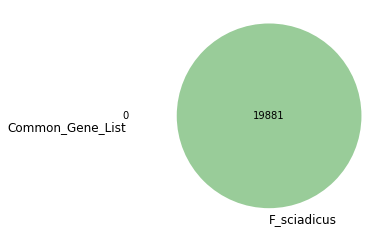

24903


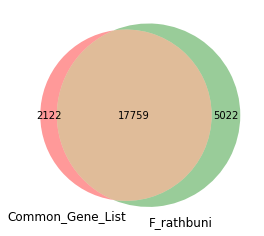

26184


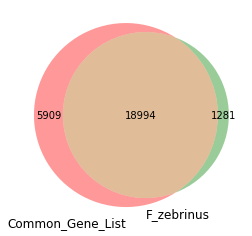

28334


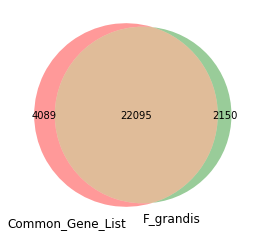

29064


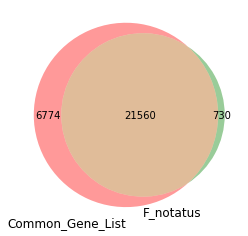

29485


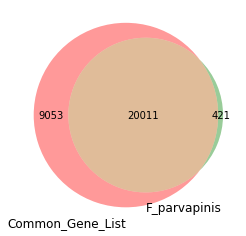

29824


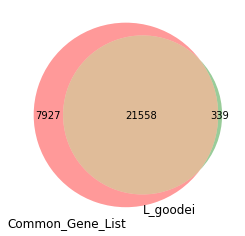

30087


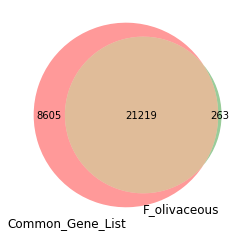

30359


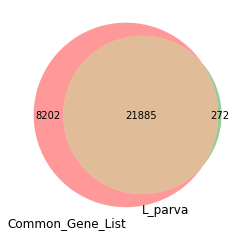

30727


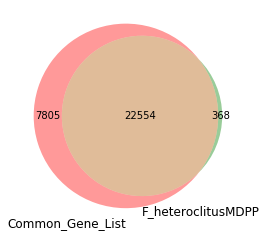

30921


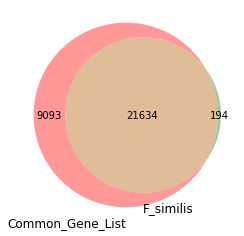

31036


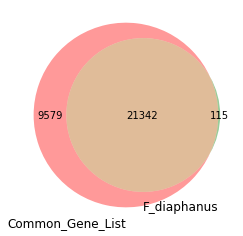

31178


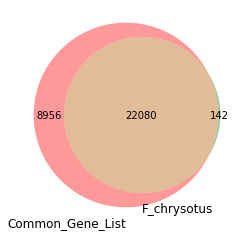

31252


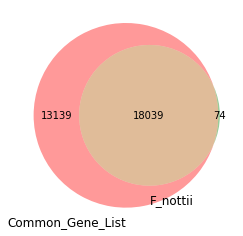

31367


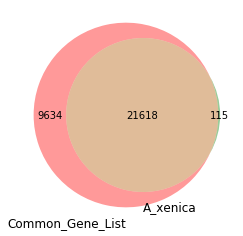

31475


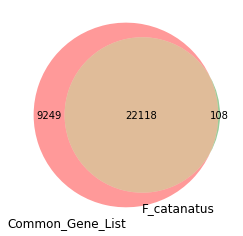

31590


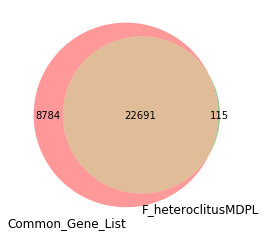

In [56]:
gene_list_common = []
# construct common gene list (union)
for genes_file in counts_matrices:
    if genes_file.endswith(".csv"):
        species = genes_file.split("_")[0]+"_"+genes_file.split("_")[1]
        table = pd.read_csv(counts_dir+genes_file,sep="\t")
        table = table.rename(columns={'Unnamed: 0': 'Ensembl'})
        # if countsvalue is >5 in any column, then keep
        table_filt = table[(table.iloc[:,1:] > 5).any(1)]
        species_genes = table['Ensembl'].tolist()
        #species_genes = [item for sublist in species_genes for item in sublist]
        a = set(species_genes)
        b = set(gene_list_common)
        gene_list_common = list(a | b)
        print(len(gene_list_common))
        gene_list_common.extend(gene_list_common)
        venn2(subsets = (len(b)-len(a.intersection(b)), 
                 len(a)-len(b.intersection(a)), 
                 len(b.intersection(a))), set_labels = ('Common_Gene_List',species))
        plt.show()
# construct unique gene list ()

In [6]:
print(len(gene_list_common))
print(len(set(gene_list_common)))

63180
31590


19881


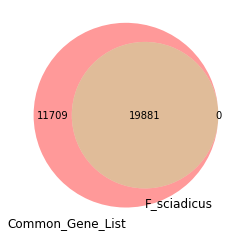

22781


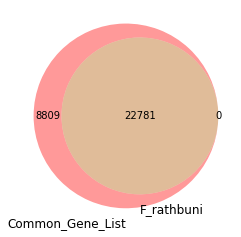

20275


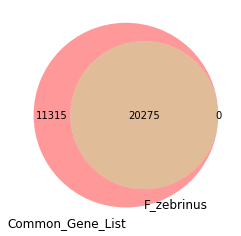

24245


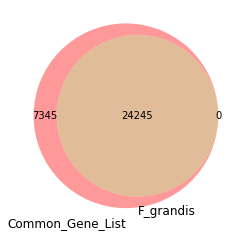

22290


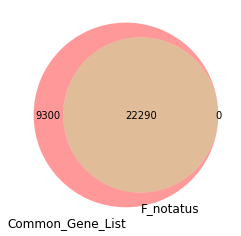

20432


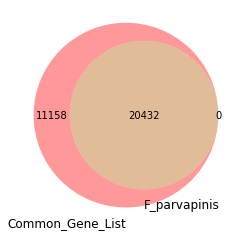

21897


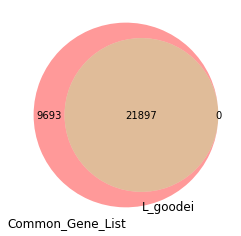

21482


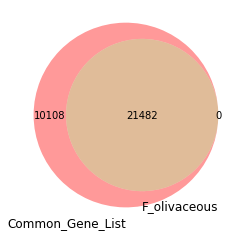

22157


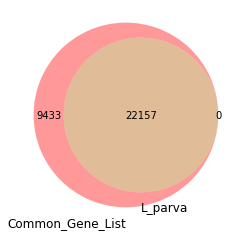

22922


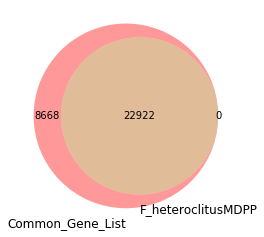

21828


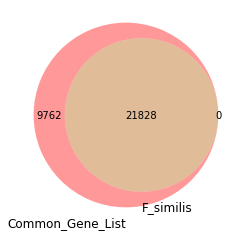

21457


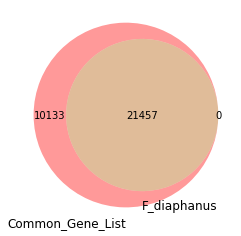

22222


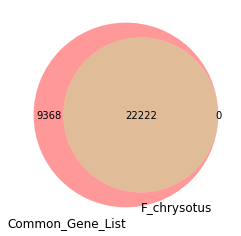

18113


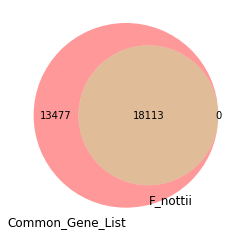

21733


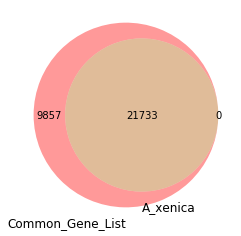

22226


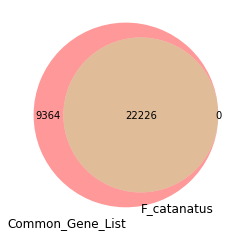

22806


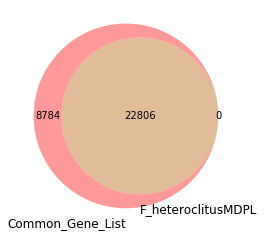

In [57]:
# only genes that are in common across all species
for genes_file in counts_matrices:
    if genes_file.endswith(".csv"):
        species = genes_file.split("_")[0]+"_"+genes_file.split("_")[1]
        table = pd.read_csv(counts_dir+genes_file,sep="\t")
        table = table.rename(columns={'Unnamed: 0': 'Ensembl'})
        table_filt = table[(table.iloc[:,1:] > 5).any(1)]
        species_genes = table['Ensembl'].tolist()
        a = set(species_genes)
        b = set(gene_list_common)
        species_list = list(a & b)
        print(len(species_list))
        venn2(subsets = (len(b)-len(a.intersection(b)), 
                 len(a)-len(b.intersection(a)), 
                 len(b.intersection(a))), set_labels = ('Common_Gene_List',species))
        plt.show()

In [59]:
print(counts_matrices)
print(len(counts_matrices))

['F_sciadicus_counts_ensembl.csv', 'F_rathbuni_counts_ensembl.csv', 'F_zebrinus_counts_ensembl.csv', 'F_grandis_counts_ensembl.csv', 'F_notatus_counts_ensembl.csv', '.DS_Store', 'F_parvapinis_counts_ensembl.csv', 'L_goodei_counts_ensembl.csv', 'F_olivaceous_counts_ensembl.csv', 'L_parva_counts_ensembl.csv', 'F_heteroclitusMDPP_counts_ensembl.csv', 'F_similis_counts_ensembl.csv', 'F_diaphanus_counts_ensembl.csv', 'F_chrysotus_counts_ensembl.csv', 'F_nottii_counts_ensembl.csv', 'A_xenica_counts_ensembl.csv', 'F_catanatus_counts_ensembl.csv', 'F_heteroclitusMDPL_counts_ensembl.csv']
18


In [60]:
count = 0
gene_list_common = []
for genes_file1 in counts_matrices:
    if genes_file1.endswith(".csv"):
        species1 = genes_file1.split("_")[0]+"_"+genes_file1.split("_")[1]
        for genes_file2 in counts_matrices:
            if genes_file2 != genes_file1:
                if genes_file2.endswith(".csv"):
                    species2 = genes_file2.split("_")[0]+"_"+genes_file2.split("_")[1]
                    table1 = pd.read_csv(counts_dir+genes_file1,sep="\t")
                    table1 = table1.rename(columns={'Unnamed: 0': 'Ensembl'})
                    table1_filt = table1[(table1.iloc[:,1:] > 5).any(1)]
                    table2 = pd.read_csv(counts_dir+genes_file2,sep="\t")
                    table2 = table2.rename(columns={'Unnamed: 0': 'Ensembl'})
                    table2_filt = table2[(table2.iloc[:,1:] > 5).any(1)]
                    species_genes1 = table1_filt['Ensembl'].tolist()
                    species_genes2 = table2_filt['Ensembl'].tolist()
                    a = set(species_genes1)
                    b = set(species_genes2)
                    genes_list = list(a | b)
                    print(len(genes_list))
                    gene_list_common.extend(genes_list)
#difference=filter(lambda x:x not in list2,list1)

23134
21348
24240
22647
21512
22327
21932
22739
23040
21914
22058
22773
20676
22193
22836
22939
23134
23301
25060
23985
23395
23846
23559
24094
24225
23484
23362
24149
22883
23816
24014
24158
21348
23301
24317
22821
21594
22439
22103
22810
23122
21970
22162
22915
20727
22331
22853
23040
24240
25060
24317
24951
24413
24688
24607
24899
24848
24395
24468
24984
23967
24703
24855
24694
22647
23985
22821
24951
22921
23410
22907
23665
24113
23141
23292
23662
22375
23355
23708
23859
21512
23395
21594
24413
22921
22504
22271
22897
23235
22048
22321
23049
20913
22401
22998
23164
22327
23846
22439
24688
23410
22504
22932
22823
23778
22773
22914
23419
21993
23017
23530
23605
21932
23559
22103
24607
22907
22271
22932
23210
23575
22503
22709
23218
21496
22750
23255
23400
22739
24094
22810
24899
23665
22897
22823
23210
24042
23110
23247
23686
22425
23322
23756
23902
23040
24225
23122
24848
24113
23235
23778
23575
24042
23287
23411
24187
22648
23697
24120
23519
21914
23484
21970
24395
23141
22048
2277

In [61]:
gene_list_common_intersect = gene_list_common
print(len(gene_list_common_intersect))
print(len(set(gene_list_common)))
gene_list_common = list(set(gene_list_common))

6301600
30482


19817


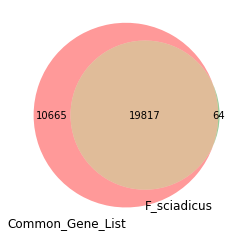

22643


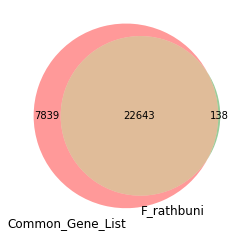

20210


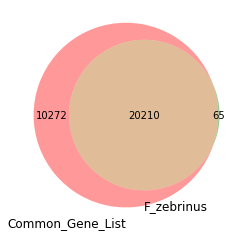

23919


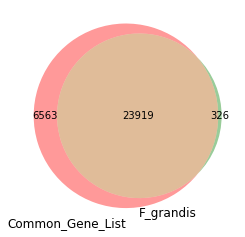

22153


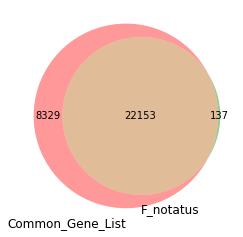

20328


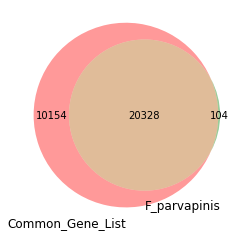

21772


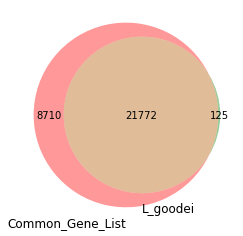

21376


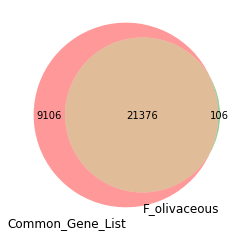

22029


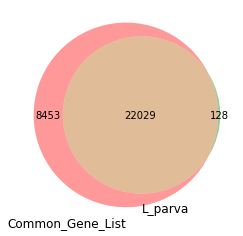

22744


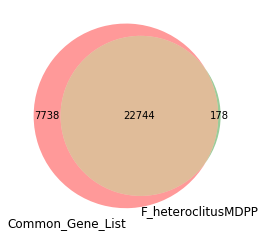

21674


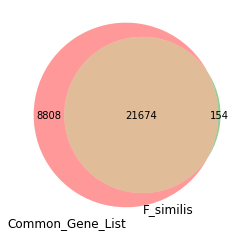

21357


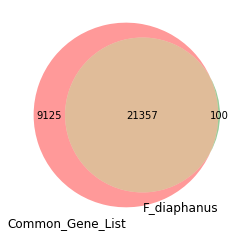

22107


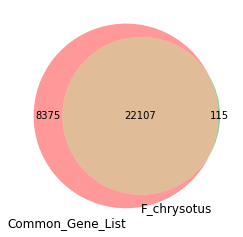

18080


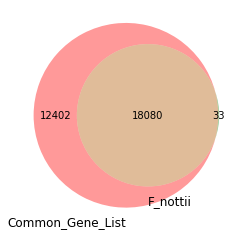

21628


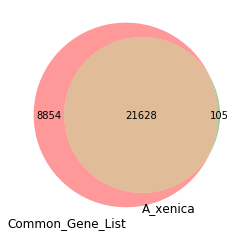

22115


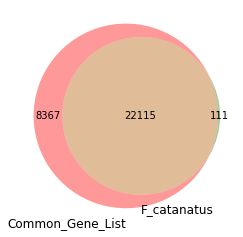

22650


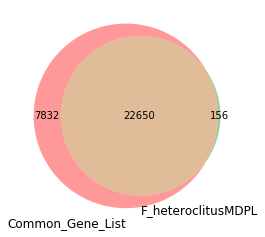

In [64]:
for genes_file in counts_matrices:
    if genes_file != ".DS_Store":
        species = genes_file.split("_")[0]+"_"+genes_file.split("_")[1]
        table = pd.read_csv(counts_dir+genes_file,sep="\t")
        table = table.rename(columns={'Unnamed: 0': 'Evigene'})
        species_genes = table['Evigene'].tolist()
        a = set(species_genes)
        b = set(gene_list_common_intersect)
        species_list = list(a & b)
        print(len(species_list))
        venn2(subsets = (len(b)-len(a.intersection(b)), 
                 len(a)-len(b.intersection(a)), 
                 len(b.intersection(a))), set_labels = ('Common_Gene_List',species))
        plt.show()

In [65]:
species_counts = pd.DataFrame()
species_counts['Ensembl'] = ""  
for genes_file in counts_matrices:
    if genes_file.endswith(".csv"):
        species = genes_file.split("_")[0]+"_"+genes_file.split("_")[1]
        print("========")
        print(species)
        print("========")
        table = pd.read_csv(counts_dir+genes_file,sep="\t")
        table = table.rename(columns={'Unnamed: 0': 'Ensembl'})
        counts = table[table['Ensembl'].isin(gene_list_common)]
        cols = counts.columns.tolist()
        colnames = ['Ensembl']
        for i in cols:
            if i.startswith(species):
                colnames.append(i)
        counts = counts[colnames]
        species_counts = pd.merge(species_counts,counts,on='Ensembl',how='outer')
        print(species_counts.shape)

F_sciadicus
(19817, 5)
F_rathbuni
(24708, 14)
F_zebrinus
(25936, 18)
F_grandis
(27816, 27)
F_notatus
(28468, 36)
F_parvapinis
(28836, 44)
L_goodei
(29125, 53)
F_olivaceous
(29343, 61)
L_parva
(29568, 70)
F_heteroclitusMDPP
(29850, 79)
F_similis
(29981, 88)
F_diaphanus
(30067, 94)
F_chrysotus
(30182, 102)
F_nottii
(30240, 104)
A_xenica
(30328, 113)
F_catanatus
(30404, 120)
F_heteroclitusMDPL
(30482, 129)


In [66]:
species_counts = species_counts.fillna(0)

In [67]:
species_counts.head()

,Ensembl,F_sciadicus_BW_1.quant,F_sciadicus_FW_1.quant,F_sciadicus_FW_2.quant,F_sciadicus_transfer_1.quant,F_rathbuni_BW_1.quant,F_rathbuni_BW_2.quant,F_rathbuni_BW_3.quant,F_rathbuni_FW_1.quant,F_rathbuni_FW_2.quant,F_rathbuni_FW_3.quant,F_rathbuni_transfer_1.quant,F_rathbuni_transfer_2.quant,F_rathbuni_transfer_3.quant,F_zebrinus_BW_1.quant,F_zebrinus_BW_2.quant,F_zebrinus_FW_1.quant,F_zebrinus_FW_2.quant,F_grandis_BW_1.quant,F_grandis_BW_2.quant,F_grandis_BW_3.quant,F_grandis_FW_1.quant,F_grandis_FW_2.quant,F_grandis_FW_3.quant,F_grandis_transfer_1.quant,F_grandis_transfer_2.quant,F_grandis_transfer_3.quant,F_notatus_BW_1.quant,F_notatus_BW_2.quant,F_notatus_BW_3.quant,F_notatus_FW_1.quant,F_notatus_FW_2.quant,F_notatus_FW_3.quant,F_notatus_transfer_1.quant,F_notatus_transfer_2.quant,F_notatus_transfer_3.quant,F_parvapinis_BW_1.quant,F_parvapinis_BW_2.quant,F_parvapinis_BW_3.quant,F_parvapinis_FW_1.quant,F_parvapinis_FW_2.quant,F_parvapinis_FW_3.quant,F_parvapinis_transfer_1.quant,F_parvapinis_transfer_2.quant,L_goodei_BW_1.quant,L_goodei_BW_2.quant,L_goodei_BW_3.quant,L_goodei_FW_1.quant,L_goodei_FW_2.quant,L_goodei_FW_3.quant,L_goodei_transfer_1.quant,L_goodei_transfer_2.quant,L_goodei_transfer_3.quant,F_olivaceous_BW_1.quant,F_olivaceous_BW_2.quant,F_olivaceous_BW_3.quant,F_olivaceous_FW_1.quant,F_olivaceous_FW_2.quant,F_olivaceous_FW_3.quant,F_olivaceous_transfer_1.quant,F_olivaceous_transfer_2.quant,L_parva_BW_1.quant,L_parva_BW_2.quant,L_parva_BW_3.quant,L_parva_FW_1.quant,L_parva_FW_2.quant,L_parva_FW_3.quant,L_parva_transfer_1.quant,L_parva_transfer_2.quant,L_parva_transfer_3.quant,F_heteroclitusMDPP_BW_1.quant,F_heteroclitusMDPP_BW_2.quant,F_heteroclitusMDPP_BW_3.quant,F_heteroclitusMDPP_FW_1.quant,F_heteroclitusMDPP_FW_2.quant,F_heteroclitusMDPP_FW_3.quant,F_heteroclitusMDPP_transfer_1.quant,F_heteroclitusMDPP_transfer_2.quant,F_heteroclitusMDPP_transfer_3.quant,F_similis_BW_1.quant,F_similis_BW_2.quant,F_similis_BW_3.quant,F_similis_FW_1.quant,F_similis_FW_2.quant,F_similis_FW_3.quant,F_similis_transfer_1.quant,F_similis_transfer_2.quant,F_similis_transfer_3.quant,F_diaphanus_BW_1.quant,F_diaphanus_BW_2.quant,F_diaphanus_FW_2.quant,F_diaphanus_FW_3.quant,F_diaphanus_transfer_1.quant,F_diaphanus_transfer_2.quant,F_chrysotus_BW_1.quant,F_chrysotus_BW_2.quant,F_chrysotus_BW_3.quant,F_chrysotus_FW_1.quant,F_chrysotus_FW_2.quant,F_chrysotus_FW_3.quant,F_chrysotus_transfer_1.quant,F_chrysotus_transfer_2.quant,F_nottii_FW_1.quant,F_nottii_FW_2.quant,A_xenica_BW_1.quant,A_xenica_BW_2.quant,A_xenica_BW_3.quant,A_xenica_FW_1.quant,A_xenica_FW_2.quant,A_xenica_FW_3.quant,A_xenica_transfer_1.quant,A_xenica_transfer_2.quant,A_xenica_transfer_3.quant,F_catanatus_BW_1.quant,F_catanatus_BW_2.quant,F_catanatus_BW_3.quant,F_catanatus_FW_1.quant,F_catanatus_FW_2.quant,F_catanatus_transfer_1.quant,F_catanatus_transfer_2.quant,F_heteroclitusMDPL_BW_1.quant,F_heteroclitusMDPL_BW_2.quant,F_heteroclitusMDPL_BW_3.quant,F_heteroclitusMDPL_FW_1.quant,F_heteroclitusMDPL_FW_2.quant,F_heteroclitusMDPL_FW_3.quant,F_heteroclitusMDPL_transfer_1.quant,F_heteroclitusMDPL_transfer_2.quant,F_heteroclitusMDPL_transfer_3.quant
0,ENSFHEP00000000002,6.000,0.000,0.000,2.000,8.000,0.000,0.000,9.000,4.770,0.000,3.533,2.000,206.135,6.000,1.000,67.000,16.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,16.000,22.000,15.116,40.000,26.000,9.095,19.000,78.000,7.000,7.000,4.000,3.00,3.000,5.000,10.000,2.000,1.000,18.000,4.000,2.000,1.000,2.000,22.000,2.000,4.000,21205.813,19024.491,15918.534,17852.617,12074.190,8731.078,11003.823,5974.699,2.000,8.144,24.110,8.000,5.005,2.000,4.000,2.999,11.248,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,130.630,136.868,237.183,262.256,164.361,1812.463,44.044,68.531,112.142,1.000,2.000,0.000,1.000,3.000,0.000,20.000,12.398,14.000,6.000,8.000,5.000,8.000,3.000,0.000,0.000,14.813,12.000,21.620,13.000,8.000,8.000,4.000,18.000,16.000,0.000,0.000,2.000,42.830,3.219,24.805,3.000,2.000,1.000,2.000,3.000,0.000,0.

In [68]:
species_counts.shape

(30482, 129)

In [69]:
species_filt = species_counts[(species_counts.iloc[:,1:] > 5).any(1)]

In [70]:
species_filt.shape

(30482, 129)

In [36]:
species_counts.to_csv("/Users/johnsolk/Documents/UCDavis/Whitehead/kfish_expression_July2019/Ensembl_species_counts.csv",index=False,index_label=None)

# Design rows

In [37]:
cols = species_counts.columns.tolist()

In [38]:
print(cols)

['Ensembl', 'F_sciadicus_BW_1.quant', 'F_sciadicus_FW_1.quant', 'F_sciadicus_FW_2.quant', 'F_sciadicus_transfer_1.quant', 'F_rathbuni_BW_1.quant', 'F_rathbuni_BW_2.quant', 'F_rathbuni_BW_3.quant', 'F_rathbuni_FW_1.quant', 'F_rathbuni_FW_2.quant', 'F_rathbuni_FW_3.quant', 'F_rathbuni_transfer_1.quant', 'F_rathbuni_transfer_2.quant', 'F_rathbuni_transfer_3.quant', 'F_zebrinus_BW_1.quant', 'F_zebrinus_BW_2.quant', 'F_zebrinus_FW_1.quant', 'F_zebrinus_FW_2.quant', 'F_grandis_BW_1.quant', 'F_grandis_BW_2.quant', 'F_grandis_BW_3.quant', 'F_grandis_FW_1.quant', 'F_grandis_FW_2.quant', 'F_grandis_FW_3.quant', 'F_grandis_transfer_1.quant', 'F_grandis_transfer_2.quant', 'F_grandis_transfer_3.quant', 'F_notatus_BW_1.quant', 'F_notatus_BW_2.quant', 'F_notatus_BW_3.quant', 'F_notatus_FW_1.quant', 'F_notatus_FW_2.quant', 'F_notatus_FW_3.quant', 'F_notatus_transfer_1.quant', 'F_notatus_transfer_2.quant', 'F_notatus_transfer_3.quant', 'F_parvapinis_BW_1.quant', 'F_parvapinis_BW_2.quant', 'F_parvapinis

In [43]:
# matrix 1: full
# changed F. similis to Clade 3
clade_design = {"A_xenica":"Clade3","F_catanatus":"Clade1","F_chrysotus":"Clade3",
 "F_diaphanus":"Clade1","F_grandis":"Clade1","F_heteroclitusMDPL":"Clade1",
 "F_heteroclitusMDPP":"Clade1","F_notatus":"Clade3","F_nottii":"Clade3",
 "F_olivaceous":"Clade3","F_parvapinis":"Clade2","F_rathbuni":"Clade1",
 "F_sciadicus":"Clade3","F_similis":"Clade3","F_zebrinus":"Clade3",
 "L_goodei":"Clade2","L_parva":"Clade2"}
combined_design = {"A_xenica":"M_Clade3","F_catanatus":"FW_Clade1","F_chrysotus":"M_Clade3",
 "F_diaphanus":"M_Clade1","F_grandis":"M_Clade1","F_heteroclitusMDPL":"M_Clade1",
 "F_heteroclitusMDPP":"M_Clade1","F_notatus":"FW_Clade3","F_nottii":"FW_Clade3",
 "F_olivaceous":"FW_Clade3","F_parvapinis":"M_Clade2","F_rathbuni":"FW_Clade1",
 "F_sciadicus":"FW_Clade3","F_similis":"M_Clade3","F_zebrinus":"M_Clade3",
 "L_goodei":"FW_Clade2","L_parva":"M_Clade2"}
phys_design = {"A_xenica":"M","F_catanatus":"FW","F_chrysotus":"M",
 "F_diaphanus":"M","F_grandis":"M","F_heteroclitusMDPL":"M",
 "F_heteroclitusMDPP":"M","F_notatus":"FW","F_nottii":"FW",
 "F_olivaceous":"FW","F_parvapinis":"M","F_rathbuni":"FW",
 "F_sciadicus":"FW","F_similis":"M","F_zebrinus":"M",
 "L_goodei":"FW","L_parva":"M"}

In [40]:
# matrix 2: abbreviated
# removed F. chrysotus
# removed F. diaphanus
clade_design = {"A_xenica":"Clade3","F_catanatus":"Clade1","F_grandis":"Clade1","F_heteroclitusMDPL":"Clade1",
 "F_heteroclitusMDPP":"Clade1","F_notatus":"Clade3","F_nottii":"Clade3",
 "F_olivaceous":"Clade3","F_parvapinis":"Clade2","F_rathbuni":"Clade1",
 "F_sciadicus":"Clade3","F_similis":"Clade3","F_zebrinus":"Clade3",
 "L_goodei":"Clade2","L_parva":"Clade2"}
combined_design = {"A_xenica":"M_Clade3","F_catanatus":"FW_Clade1","F_grandis":"M_Clade1","F_heteroclitusMDPL":"M_Clade1",
 "F_heteroclitusMDPP":"M_Clade1","F_notatus":"FW_Clade3","F_nottii":"FW_Clade3",
 "F_olivaceous":"FW_Clade3","F_parvapinis":"M_Clade2","F_rathbuni":"FW_Clade1",
 "F_sciadicus":"FW_Clade3","F_similis":"M_Clade3","F_zebrinus":"M_Clade3",
 "L_goodei":"FW_Clade2","L_parva":"M_Clade2"}
phys_design = {"A_xenica":"M","F_catanatus":"FW","F_grandis":"M","F_heteroclitusMDPL":"M",
 "F_heteroclitusMDPP":"M","F_notatus":"FW","F_nottii":"FW",
 "F_olivaceous":"FW","F_parvapinis":"M","F_rathbuni":"FW",
 "F_sciadicus":"FW","F_similis":"M","F_zebrinus":"M",
 "L_goodei":"FW","L_parva":"M"}

In [44]:
species_list = ['Empty']
physiology_list = ['Empty']
clade_list = ['Empty']
combined_list = ['Empty']
condition_list = ['Empty']
for col in cols:
    if col != "Ensembl":
        species = col.split("_")[0]+"_"+col.split("_")[1]
        condition = col.split("_")[2]
        if condition == "BW":
            condition = "15_ppt"
        if condition == "FW":
            condition = "0.2_ppt"
        condition_list.append(condition)
        species_list.append(species)
        physiology = phys_design[species]
        physiology_list.append(physiology)
        clade = clade_design[species]
        clade_list.append(clade)
        design = combined_design[species]
        combined_list.append(design)
print(len(species_list))
print(len(physiology_list))
print(len(clade_list))
print(len(combined_list))
print(len(condition_list))

129
129
129
129
129


In [45]:
species_counts.columns

Index(['Ensembl', 'F_sciadicus_BW_1.quant', 'F_sciadicus_FW_1.quant',
       'F_sciadicus_FW_2.quant', 'F_sciadicus_transfer_1.quant',
       'F_rathbuni_BW_1.quant', 'F_rathbuni_BW_2.quant',
       'F_rathbuni_BW_3.quant', 'F_rathbuni_FW_1.quant',
       'F_rathbuni_FW_2.quant',
       ...
       'F_catanatus_transfer_2.quant', 'F_heteroclitusMDPL_BW_1.quant',
       'F_heteroclitusMDPL_BW_2.quant', 'F_heteroclitusMDPL_BW_3.quant',
       'F_heteroclitusMDPL_FW_1.quant', 'F_heteroclitusMDPL_FW_2.quant',
       'F_heteroclitusMDPL_FW_3.quant', 'F_heteroclitusMDPL_transfer_1.quant',
       'F_heteroclitusMDPL_transfer_2.quant',
       'F_heteroclitusMDPL_transfer_3.quant'],
      dtype='object', length=129)

In [46]:
species_counts.shape

(30482, 129)

In [47]:
df = pd.DataFrame([species_list],columns=species_counts.columns)
df2 = pd.DataFrame([physiology_list],columns=species_counts.columns)
df3 = pd.DataFrame([clade_list],columns=species_counts.columns)
df4 = pd.DataFrame([combined_list],columns=species_counts.columns)
df5 = pd.DataFrame([condition_list],columns=species_counts.columns)
print(df.shape)
print(df2.shape)
print(df3.shape)
print(df4.shape)
print(df5.shape)
#df.head()
species_counts_real = species_counts.append(df)
species_counts_real = species_counts_real.append(df2)
species_counts_real = species_counts_real.append(df3)
species_counts_real = species_counts_real.append(df4)
species_counts_real = species_counts_real.append(df5)
print(species_counts_real.shape)

(1, 129)
(1, 129)
(1, 129)
(1, 129)
(1, 129)
(30487, 129)


In [48]:
pd.set_option('display.max_columns',500)
species_counts_real.tail(5)

,Ensembl,F_sciadicus_BW_1.quant,F_sciadicus_FW_1.quant,F_sciadicus_FW_2.quant,F_sciadicus_transfer_1.quant,F_rathbuni_BW_1.quant,F_rathbuni_BW_2.quant,F_rathbuni_BW_3.quant,F_rathbuni_FW_1.quant,F_rathbuni_FW_2.quant,F_rathbuni_FW_3.quant,F_rathbuni_transfer_1.quant,F_rathbuni_transfer_2.quant,F_rathbuni_transfer_3.quant,F_zebrinus_BW_1.quant,F_zebrinus_BW_2.quant,F_zebrinus_FW_1.quant,F_zebrinus_FW_2.quant,F_grandis_BW_1.quant,F_grandis_BW_2.quant,F_grandis_BW_3.quant,F_grandis_FW_1.quant,F_grandis_FW_2.quant,F_grandis_FW_3.quant,F_grandis_transfer_1.quant,F_grandis_transfer_2.quant,F_grandis_transfer_3.quant,F_notatus_BW_1.quant,F_notatus_BW_2.quant,F_notatus_BW_3.quant,F_notatus_FW_1.quant,F_notatus_FW_2.quant,F_notatus_FW_3.quant,F_notatus_transfer_1.quant,F_notatus_transfer_2.quant,F_notatus_transfer_3.quant,F_parvapinis_BW_1.quant,F_parvapinis_BW_2.quant,F_parvapinis_BW_3.quant,F_parvapinis_FW_1.quant,F_parvapinis_FW_2.quant,F_parvapinis_FW_3.quant,F_parvapinis_transfer_1.quant,F_parvapinis_transfer_2.quant,L_goodei_BW_1.quant,L_goodei_BW_2.quant,L_goodei_BW_3.quant,L_goodei_FW_1.quant,L_goodei_FW_2.quant,L_goodei_FW_3.quant,L_goodei_transfer_1.quant,L_goodei_transfer_2.quant,L_goodei_transfer_3.quant,F_olivaceous_BW_1.quant,F_olivaceous_BW_2.quant,F_olivaceous_BW_3.quant,F_olivaceous_FW_1.quant,F_olivaceous_FW_2.quant,F_olivaceous_FW_3.quant,F_olivaceous_transfer_1.quant,F_olivaceous_transfer_2.quant,L_parva_BW_1.quant,L_parva_BW_2.quant,L_parva_BW_3.quant,L_parva_FW_1.quant,L_parva_FW_2.quant,L_parva_FW_3.quant,L_parva_transfer_1.quant,L_parva_transfer_2.quant,L_parva_transfer_3.quant,F_heteroclitusMDPP_BW_1.quant,F_heteroclitusMDPP_BW_2.quant,F_heteroclitusMDPP_BW_3.quant,F_heteroclitusMDPP_FW_1.quant,F_heteroclitusMDPP_FW_2.quant,F_heteroclitusMDPP_FW_3.quant,F_heteroclitusMDPP_transfer_1.quant,F_heteroclitusMDPP_transfer_2.quant,F_heteroclitusMDPP_transfer_3.quant,F_similis_BW_1.quant,F_similis_BW_2.quant,F_similis_BW_3.quant,F_similis_FW_1.quant,F_similis_FW_2.quant,F_similis_FW_3.quant,F_similis_transfer_1.quant,F_similis_transfer_2.quant,F_similis_transfer_3.quant,F_diaphanus_BW_1.quant,F_diaphanus_BW_2.quant,F_diaphanus_FW_2.quant,F_diaphanus_FW_3.quant,F_diaphanus_transfer_1.quant,F_diaphanus_transfer_2.quant,F_chrysotus_BW_1.quant,F_chrysotus_BW_2.quant,F_chrysotus_BW_3.quant,F_chrysotus_FW_1.quant,F_chrysotus_FW_2.quant,F_chrysotus_FW_3.quant,F_chrysotus_transfer_1.quant,F_chrysotus_transfer_2.quant,F_nottii_FW_1.quant,F_nottii_FW_2.quant,A_xenica_BW_1.quant,A_xenica_BW_2.quant,A_xenica_BW_3.quant,A_xenica_FW_1.quant,A_xenica_FW_2.quant,A_xenica_FW_3.quant,A_xenica_transfer_1.quant,A_xenica_transfer_2.quant,A_xenica_transfer_3.quant,F_catanatus_BW_1.quant,F_catanatus_BW_2.quant,F_catanatus_BW_3.quant,F_catanatus_FW_1.quant,F_catanatus_FW_2.quant,F_catanatus_transfer_1.quant,F_catanatus_transfer_2.quant,F_heteroclitusMDPL_BW_1.quant,F_heteroclitusMDPL_BW_2.quant,F_heteroclitusMDPL_BW_3.quant,F_heteroclitusMDPL_FW_1.quant,F_heteroclitusMDPL_FW_2.quant,F_heteroclitusMDPL_FW_3.quant,F_heteroclitusMDPL_transfer_1.quant,F_heteroclitusMDPL_transfer_2.quant,F_heteroclitusMDPL_transfer_3.quant
0,Empty,F_sciadicus,F_sciadicus,F_sciadicus,F_sciadicus,F_rathbuni,F_rathbuni,F_rathbuni,F_rathbuni,F_rathbuni,F_rathbuni,F_rathbuni,F_rathbuni,F_rathbuni,F_zebrinus,F_zebrinus,F_zebrinus,F_zebrinus,F_grandis,F_grandis,F_grandis,F_grandis,F_grandis,F_grandis,F_grandis,F_grandis,F_grandis,F_notatus,F_notatus,F_notatus,F_notatus,F_notatus,F_notatus,F_notatus,F_notatus,F_notatus,F_parvapinis,F_parvapinis,F_parvapinis,F_parvapinis,F_parvapinis,F_parvapinis,F_parvapinis,F_parvapinis,L_goodei,L_goodei,L_goodei,L_goodei,L_goodei,L_goodei,L_goodei,L_goodei,L_goodei,F_olivaceous,F_olivaceous,F_olivaceous,F_olivaceous,F_olivaceous,F_olivaceous,F_olivaceous,F_olivaceous,L_parva,L_parva,L_parva,L_parva,L_parva,L_parva,L_parva,L_parva,L_parva,F_heteroclitusMDPP,F_heteroclitusMDPP,F_heteroclitusMDPP,F_heteroclitusMDPP,F_heteroclitusMDPP,F_het

In [49]:
#species_counts_real.to_csv("/Users/johnsolk/Documents/UCDavis/Whitehead/kfish_expression_July2019/Ensembl_species_counts_designfactors.csv")

In [51]:
species_counts_real.shape

(30487, 129)

In [ ]:
#species_counts_real.to_csv("/Users/johnsolk/Documents/UCDavis/Whitehead/kfish_expression_July2019/Ensembl_species_counts_designfactors_removed_Fchry_Fdiaph.csv")